In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [33]:
def luminosity_to_jy(velocity, data, rest_frequency: float = 115.27):
        """
        This function takes as input a pandas db containing luminosities in K km s-1 pc2, redshifts, and luminosity distances in Mpc, 
        and returns the brightness values in Jy.
        
        Parameters:
        velocity (float): The velocity dispersion assumed for the line (Km s-1).
        data (pandas.DataFrame): A pandas DataFrame containing the data.
        rest_frequency (float): The rest frequency of the line in GHz. Defaults to 115.27 GHz for CO(1-0).

        Output:
        sigma: numpy.ndarray: An array of brightness values in Jy.

        """
        alpha = 3.255 * 10**7
        sigma = (data['Luminosity(K km s-1 pc2)'] * ( (1 + data['#redshift']) * rest_frequency **2)) / (alpha * velocity * (data['luminosity distance(Mpc)']**2))
        redshift = data['#redshift'].values
        return sigma

def exponential_func(x, a, b):
        """
        Exponential function used to fit the data.
        """
        return a * np.exp(-b * x)
# Define a function to fit the PDF with a polynomial
def fit_func(x, *coeffs):
    return np.polynomial.polynomial.polyval(x, coeffs)




def sample_from_brightness(n, velocity, rest_frequency, data_path):
    """
    Generates n samples of brightness values based on an exponential fit to the data.
    
    Parameters:
    n (int): Number of samples to generate.
    velocity (float): The velocity dispersion assumed for the line.
    data_path (str): Path to the CSV file containing the data.
    
    Returns:
    pd.DataFrame: A DataFrame containing the sampled brightness values and corresponding redshifts.
    """
    # Read the data from the CSV file
    data = pd.read_csv(data_path, sep='\t')
    # Calculate the brightness values (sigma) using the provided velocity
    sigma = luminosity_to_jy(velocity, data, rest_frequency)
    # Extract the redshift values from the data
    redshift = data['#redshift'].values
    # Generate evenly spaced redshifts for sampling
    np.random.seed(42)
    sampled_redshifts = np.linspace(min(redshift), max(redshift), n)
    # Fit an exponential curve to the data
    popt, pcov = curve_fit(exponential_func, redshift, sigma, )
    # Use the fitted parameters to calculate the sampled brightness values
    sampled_sigma = exponential_func(sampled_redshifts, *popt) + np.min(sigma)
    print(np.mean(sigma), np.min(sigma), np.max(sigma))
    plt.scatter(redshift, sigma, label='Data')
    plt.scatter(sampled_redshifts, sampled_sigma, label='Polinomial Fit')
    plt.xlabel('Redshift')
    plt.ylabel('Brightness (Jy)')
    plt.legend()
    plt.show()
    # Return the sampled brightness values and the corresponding redshifts
    return pd.DataFrame(zip(sampled_redshifts, sampled_sigma), columns=['Redshift', 'Brightness(Jy)'])


0.0055827030585398054 0.00026689310605380087 0.055181843228202326


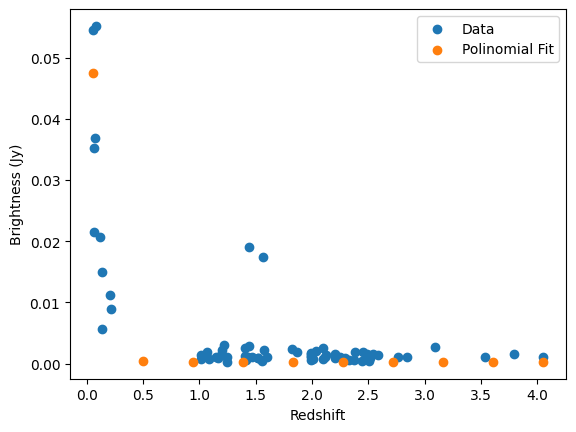

[0.04744734 0.0004602  0.00026769 0.0002669  0.00026689 0.00026689
 0.00026689 0.00026689 0.00026689 0.00026689]


In [34]:


db = sample_from_brightness(10, 200, 115.27, '/home/astro/Documents/GitHub/ALMASim/brightnes/CO10.dat')
brightness = db['Brightness(Jy)'].values
print(brightness)


#plt.scatter(data['#redshift'], data['Sigma(Jy)'], s=1)
#plt.show()

In [ ]:



def sample_extration(n, brightness_path=None, velocity=200):
    data = pd.read_csv(brightness_path, sep='\t')
    intensity = luminosity_to_jy(velocity, data)
    redshift = data['#redshift']
    
        
    

N=15
file_path_dat='C:\\Users\\lsann\\Desktop\\Tesi Magistrale\\Visual Studio\\CO10_luminosityFunction.dat'
sample = sample_extration(N,file_path_dat)
print('The extracted brightnesses sample is:\n')
print(sample)